In [1172]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.neural_network import MLPClassifier
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU

print('imported')

imported


In [1173]:
# Load and preprocess data
data = pd.read_csv('final_dataset_with_weighted_voting.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ph              2282 non-null   float64
 1   p               2282 non-null   float64
 2   k               2282 non-null   float64
 3   ca              2282 non-null   float64
 4   mg              2282 non-null   float64
 5   mn              2282 non-null   float64
 6   s               2282 non-null   float64
 7   cu              2282 non-null   float64
 8   b               2282 non-null   float64
 9   zn              2282 non-null   float64
 10  na              2282 non-null   float64
 11  fe              2282 non-null   float64
 12  al              2282 non-null   float64
 13  si              2282 non-null   float64
 14  co              2282 non-null   float64
 15  mo              2282 non-null   float64
 16  ec              2282 non-null   float64
 17  final_irrigate  2282 non-null   i

In [1174]:
# Define features (X) and target variable (y)
X = data[['ph', 'p', 'k', 'ca', 'mg', 'mn', 's', 'cu', 'b', 'zn', 'na',
        'fe', 'al', 'si', 'co', 'mo', 'ec' ,]]
y = data['final_irrigate']

In [1175]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 6.93952155e-15,  4.79774618e+00,  8.73745928e-01, ...,
        -1.61396014e+00, -5.25493775e-01,  8.52754739e-16],
       [ 1.09013680e+00, -1.30528991e+00,  4.71672526e+00, ...,
        -1.50501785e+00,  1.34527315e+00, -1.35839560e+00],
       [ 6.93952155e-15,  3.69134782e+00,  1.22520974e+00, ...,
        -1.59580309e+00, -7.28888735e-02,  8.52754739e-16],
       ...,
       [ 6.93952155e-15, -2.28235156e-15, -1.57724248e-15, ...,
         1.61266982e-15,  6.02990860e-15,  8.52754739e-16],
       [ 6.93952155e-15, -2.28235156e-15, -1.57724248e-15, ...,
         1.61266982e-15,  6.02990860e-15,  8.52754739e-16],
       [ 6.93952155e-15, -2.28235156e-15, -1.57724248e-15, ...,
         1.61266982e-15,  6.02990860e-15,  8.52754739e-16]])

In [1176]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train
X_test
y_train
y_test

1268    1
1633    0
700     1
2028    1
596     1
       ..
387     1
649     1
1645    1
1318    1
382     1
Name: final_irrigate, Length: 457, dtype: int64

In [1177]:
# Evaluation Metrics
import seaborn as sns

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('Confusion Matrix:')
    print(cm)

    sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')


In [1178]:
import seaborn as sns

# Function to plot evaluation metrics
def plot_evaluation_metrics(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    


    plt.tight_layout()
    plt.show()

In [1179]:
# # MLP MODEL

# def create_mlp_model(input_shape, layers, activation='relu', learning_rate=0.001):
#     model = Sequential()
#     for units in layers:
#         model.add(Dense(units=units, activation=activation, input_shape=input_shape))
#         input_shape = (units,)  # Update input shape for the next layer
#     model.add(Dense(1, activation='sigmoid'))
    
#     optimizer = Adam(learning_rate=learning_rate)
#     model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
#     return model

# # MLP configurations
# mlp_layers = [16]
# mlp_activation = 'relu' #relu
# mlp_learning_rate = 0.001
# mlp_epochs = 20
# mlp_batch_size = 32
# # MLP	16	1	20	0.01	32	relu
# # Creating and training MLP model
# mlp_model = create_mlp_model((17,), mlp_layers, activation=mlp_activation, learning_rate=mlp_learning_rate)
# mlp_history = mlp_model.fit(X_train, y_train, epochs=mlp_epochs, batch_size=mlp_batch_size, validation_data=(X_test, y_test))

# # Save our trained MLP model
# mlp_model.save('irrigation_prediction_mlp_model.h5')
# print("Model saved as 'irrigation_prediction_mlp_model.h5'")

# # Evaluate the model
# mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test)
# print(f'MLP Model Accuracy: {mlp_accuracy:.4f}')

# # Predictions
# y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype("int32")

# # Evaluation metrics
# evaluate_model(y_test, y_pred_mlp)


In [1180]:
# # Plot evaluation metrics
# import matplotlib.pyplot as plt

# print("\nMLP Evaluation Metrics:")
# plot_evaluation_metrics(mlp_history)

# # Extracting final accuracy and loss values
# final_train_acc = mlp_history.history['accuracy'][-1]
# final_val_acc = mlp_history.history['val_accuracy'][-1]
# final_train_loss = mlp_history.history['loss'][-1]
# final_val_loss = mlp_history.history['val_loss'][-1]

# print(f'Final Training Accuracy: {final_train_acc}')
# print(f'Final Validation Accuracy: {final_val_acc}')
# print(f'Final Training Loss: {final_train_loss}')
# print(f'Final Validation Loss: {final_val_loss}')

In [1181]:
# # LSTM MODEL

# def create_lstm_model(input_shape, lstm_units=50, layers=1, activation='tanh', learning_rate=0.001):
#     model = Sequential()
#     for _ in range(layers - 1):
#         model.add(LSTM(units=lstm_units, activation=activation, return_sequences=True, input_shape=input_shape))
#         input_shape = (None, lstm_units)  # Update input shape for the next layer
#     model.add(LSTM(units=lstm_units, activation=activation, input_shape=input_shape))
#     model.add(Dense(1, activation='sigmoid'))
    
#     optimizer = Adam(learning_rate=learning_rate)
#     model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
#     return model

# # LSTM configurations
# lstm_units = 80 #50
# lstm_layers = 2 #1
# lstm_activation = 'relu' #tanh
# lstm_learning_rate = 0.0001 #0.001
# lstm_epochs = 30 #20
# lstm_batch_size = 6 #6

# #LSTM 	80	2	30	0.0001	6	relu
# # Reshape data for LSTM
# X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# # Create and train the LSTM model
# lstm_model = create_lstm_model((17, 1), lstm_units, layers=lstm_layers, activation=lstm_activation, learning_rate=lstm_learning_rate)
# lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=lstm_epochs, batch_size=lstm_batch_size, validation_data=(X_test_lstm, y_test))

# # Save trained LSTM model
# mlp_model.save('irrigation_prediction_lstm_model.h5')
# print("Model saved as 'irrigation_prediction_lstm_model.h5'")

# # Evaluate the model
# lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test)
# print(f'LSTM Model Accuracy: {lstm_accuracy:.4f}')

# # Predictions
# y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")

# # Evaluation metrics
# evaluate_model(y_test, y_pred_lstm)


In [1182]:
# # Plot evaluation metrics
# import matplotlib.pyplot as plt

# print("\nLSTM Evaluation Metrics:")
# plot_evaluation_metrics(lstm_history)

# # Extracting final accuracy and loss values
# final_train_acc = lstm_history.history['accuracy'][-1]
# final_val_acc = lstm_history.history['val_accuracy'][-1]
# final_train_loss = lstm_history.history['loss'][-1]
# final_val_loss = lstm_history.history['val_loss'][-1]

# print(f'Final Training Accuracy: {final_train_acc}')
# print(f'Final Validation Accuracy: {final_val_acc}')
# print(f'Final Training Loss: {final_train_loss}')
# print(f'Final Validation Loss: {final_val_loss}')

/Users/abel/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.8317 - loss: 0.6756 - val_accuracy: 0.9519 - val_loss: 0.5627
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.9532 - loss: 0.4528 - val_accuracy: 0.9519 - val_loss: 0.2151
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.9622 - loss: 0.1763 - val_accuracy: 0.9519 - val_loss: 0.1849
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9480 - loss: 0.1965 - val_accuracy: 0.9519 - val_loss: 0.1674
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9543 - loss: 0.1616 - val_accuracy: 0.9519 - val_loss: 0.1555
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.9630 - loss: 0.1256 - val_accuracy: 0.9519 - val_loss: 0.1474
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.9582 - loss: 0.1376 - val_accuracy: 0.9519 - val_loss: 0.1411
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9595 - loss: 0.1212 - val_accuracy: 0.9519 - 

Model saved as 'irrigation_prediction_gru_model.h5'
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9416 - loss: 0.1470
GRU Model Accuracy: 0.9431
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step
Accuracy: 0.9431
Precision: 0.9701
Recall: 0.9701
F1 Score: 0.9701
Confusion Matrix:
[[  9  13]
 [ 13 422]]


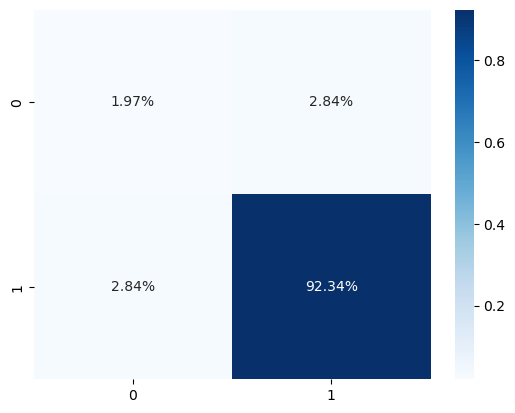

In [1183]:
# GRU MODEL

def create_gru_model(input_shape, gru_units=50, layers=1, activation='tanh', learning_rate=0.001):
    model = Sequential()
    for _ in range(layers - 1):
        model.add(GRU(units=gru_units, activation=activation, return_sequences=True, input_shape=input_shape))
        input_shape = (None, gru_units)  # Update input shape for the next layer
    model.add(GRU(units=gru_units, activation=activation, input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# GRU configurations
gru_units = 90 #50
gru_layers = 4 #1
gru_activation = 'relu' #tanh
gru_learning_rate = 0.0001 #0.001
gru_epochs = 20 #20
gru_batch_size = 32 #32

#GRU	90	4	20	0.0001	32	relu
# Reshape data for GRU
X_train_gru = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_gru = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Create and train the GRU model
gru_model = create_gru_model((17, 1), gru_units, layers=gru_layers, activation=gru_activation, learning_rate=gru_learning_rate)
gru_history = gru_model.fit(X_train_gru, y_train, epochs=gru_epochs, batch_size=gru_batch_size, validation_data=(X_test_gru, y_test))

# Save trained GRU model
mlp_model.save('irrigation_prediction_gru_model.h5')
print("Model saved as 'irrigation_prediction_gru_model.h5'")

# Evaluate the model
gru_loss, gru_accuracy = gru_model.evaluate(X_test_gru, y_test)
print(f'GRU Model Accuracy: {gru_accuracy:.4f}')

# Predictions
y_pred_gru = (gru_model.predict(X_test_gru) > 0.5).astype("int32")

# Evaluation metrics
evaluate_model(y_test, y_pred_gru)



GRU Evaluation Metrics:


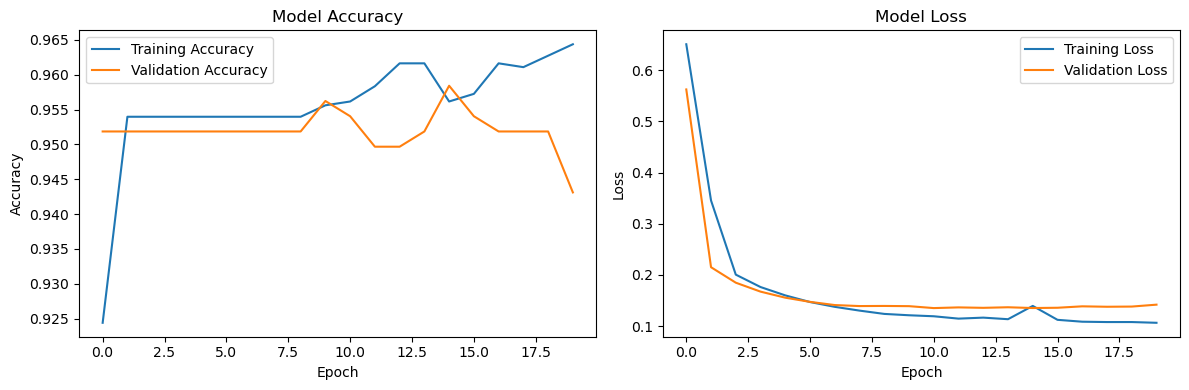

Final Training Accuracy: 0.9643835425376892
Final Validation Accuracy: 0.9431072473526001
Final Training Loss: 0.10643436759710312
Final Validation Loss: 0.14188893139362335


In [1184]:
# Plot evaluation metrics
import matplotlib.pyplot as plt

print("\nGRU Evaluation Metrics:")
plot_evaluation_metrics(gru_history)

# Extracting final accuracy and loss values
final_train_acc = gru_history.history['accuracy'][-1]
final_val_acc = gru_history.history['val_accuracy'][-1]
final_train_loss = gru_history.history['loss'][-1]
final_val_loss = gru_history.history['val_loss'][-1]

print(f'Final Training Accuracy: {final_train_acc}')
print(f'Final Validation Accuracy: {final_val_acc}')
print(f'Final Training Loss: {final_train_loss}')
print(f'Final Validation Loss: {final_val_loss}')